In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [ ]:
dataset=pd.read_csv("Testing.csv")
#parse strings to datetime type
dataset['time']=pd.to_datetime(dataset['time'],infer_datetime_format=True)
indexedDataset=dataset.set_index(['time'])

In [ ]:
from datetime import datetime
indexedDataset.head(5)

,heartRate
time,
2022-11-10 00:00:00,107
2022-11-10 00:01:00,97
2022-11-10 00:02:00,84
2022-11-10 00:03:00,80
2022-11-10 00:04:00,90


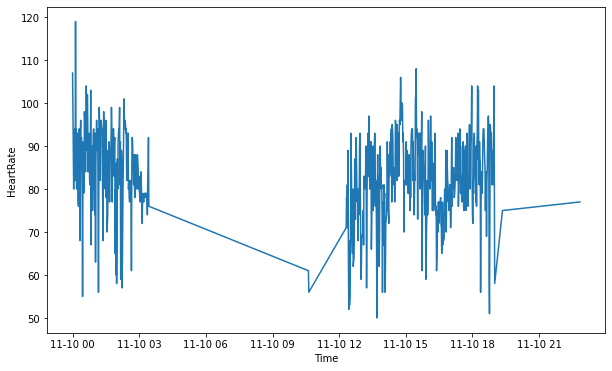

In [ ]:
##plot graph
plt.xlabel("Time")
plt.ylabel("HeartRate")
plt.plot(indexedDataset)

In [ ]:
#Determining rolling statistics
rolmean=indexedDataset.rolling(window=60).mean()
rolstd=indexedDataset.rolling(window=60).std()
print(rolmean,rolstd)

                     heartRate
time                          
2022-11-10 00:00:00        NaN
2022-11-10 00:01:00        NaN
2022-11-10 00:02:00        NaN
2022-11-10 00:03:00        NaN
2022-11-10 00:04:00        NaN
...                        ...
2022-11-10 18:58:00  85.116667
2022-11-10 18:59:00  85.166667
2022-11-10 19:00:00  84.900000
2022-11-10 19:21:00  84.950000
2022-11-10 22:50:00  84.900000

[601 rows x 1 columns]                      heartRate
time                          
2022-11-10 00:00:00        NaN
2022-11-10 00:01:00        NaN
2022-11-10 00:02:00        NaN
2022-11-10 00:03:00        NaN
2022-11-10 00:04:00        NaN
...                        ...
2022-11-10 18:58:00  10.203176
2022-11-10 18:59:00  10.199978
2022-11-10 19:00:00  10.694050
2022-11-10 19:21:00  10.639589
2022-11-10 22:50:00  10.670250

[601 rows x 1 columns]


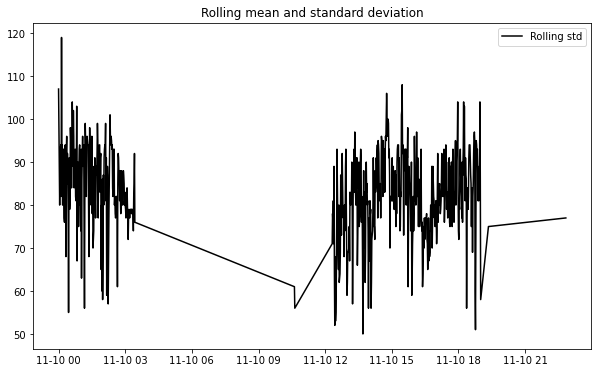

In [ ]:
#Plot rolling statistics
#orig=plt.plot(indexedDataset,color='blue',label='Original')
#mean=plt.plot(indexedDataset,color='red',label='Rolling mean')
std=plt.plot(indexedDataset,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show(block=False)

In [ ]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Result of Dickey-Fuller Test')
dftest=adfuller(indexedDataset['heartRate'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s) '%key]=value
print(dfoutput)

Result of Dickey-Fuller Test
Test Statistic                  -4.723755
p-value                          0.000076
#Lags Used                      10.000000
Number of observations Used    590.000000
Critical Value (1%)             -3.441482
Critical Value (5%)             -2.866451
Critical Value (10%)            -2.569386
dtype: float64


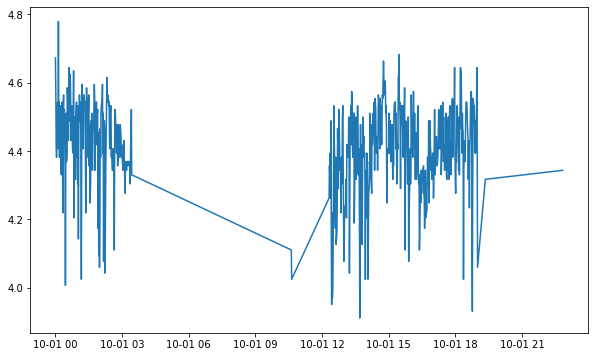

In [ ]:
#Estimating trend
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)